In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from astropy.stats import funcs

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [4]:
dfT = pd.read_hdf('kep_tess.h5')

In [10]:
dfT.shape

(249, 110)

In [8]:
def ubin(data, nbins=10):
    '''
    return ranges that put even number of 
    samples into each bin
    '''
    num = int(np.around(np.size(data) / float(nbins), decimals=0)) # avg num per bin
    if num < 1:
        num = 1

    ss = np.argsort(data)
    bsplit = data[ss][np.arange(0, num*nbins, num)]
    bins = np.concatenate((bsplit, [np.nanmax(data)]))
    return bins

In [39]:
# ALL THE STUFF FROM THE FIRST NOTEBOOK I NEED (SO FAR)
tess_dir = '/Users/james/Desktop/helloTESS/outputs/'

# if you want ALL the sectors
# rfiles = glob(tess_dir + '*rot_out.csv')
# but, we only want Sectors 14 & 15
rot1 = pd.read_csv(tess_dir + 'sector014_rot_out.csv')
rot2 = pd.read_csv(tess_dir + 'sector015_rot_out.csv')

# add a new column
rot1['Sector'] = 14
rot2['Sector'] = 15

KICTIC = pd.read_csv('/Users/james/Dropbox/research_projects/kic2tic/KIC2TIC.csv')

from astropy.table import Table
tbl = Table.read('/Users/james/Dropbox/research_projects/kic2tic/stellar17.txt', format='ascii.ipac')
stellar17 = tbl.to_pandas()
s17 = pd.DataFrame(data={'kic':stellar17['kepid'], 'kepmag':stellar17['kepmag']})

Kper13 = pd.read_csv('./amq_Period_Table.txt')
Kper14 = pd.read_table('mcquillan2014_tbl1.txt', delim_whitespace=True)
# change err column name to match 2013 paper
Kper14['Period_Err'] = Kper14['e_Period']

# Combine McQuillan 2013 & 2014, drop duplicate entries (prefer 2014, I believe)
Kper = pd.concat((Kper14[['KID', 'Period', 'Period_Err', 'Teff']], 
                  Kper13[['KID', 'Period', 'Period_Err', 'Teff']])).drop_duplicates(subset='KID')

# add TIC to the Kepler periods
KTper = Kper.merge(KICTIC, left_on='KID', right_on='KIC', how='inner')
KTper = KTper.merge(s17, left_on='KID', right_on='kic', how='inner')

# how many Kepler rotators were in Sector 14?
Trot1 = rot1.merge(KTper, left_on='TIC', right_on='TIC')

# how many Kepler rotators were in Sector 155?
Trot2 = rot2.merge(KTper, left_on='TIC', right_on='TIC')

# how many Kepler rotators were in Sector 14 OR 15?
Trot12 = pd.concat((Trot1, Trot2))

print(Trot12['KIC'].size, Trot12['KIC'].unique().size)


/Users/james/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: TableReplaceWarning: converted column 'teff_err1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/james/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: TableReplaceWarning: converted column 'teff_err2' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/james/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: TableReplaceWarning: converted column 'timeout01p5' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/james/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: TableReplaceWarning: converted column 'timeout02p0' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/james/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: TableReplaceWarning: converted

249 178


In [11]:
# now merge the new MCMC periods from Tyler (in the HDF5 data)
# with the KIC-TIC matched stuff I've already played with

In [41]:
# merge on both objectID (TIC) and the appropriate Sector
big = Trot12.merge(dfT, how='inner', left_on=('TIC', 'Sector'), right_on=('epic', 'campaign'))

In [42]:
big.shape

(249, 130)

In [56]:
dfT.columns.values

array(['yerr_mean', 'yerr_sd', 'yerr_hpd_3%', 'yerr_hpd_97%',
       'yerr_mcse_mean', 'yerr_mcse_sd', 'yerr_ess_mean', 'yerr_ess_sd',
       'yerr_ess_bulk', 'yerr_ess_tail', 'yerr_r_hat', 'yerr_mode',
       'mean_mean', 'mean_sd', 'mean_hpd_3%', 'mean_hpd_97%',
       'mean_mcse_mean', 'mean_mcse_sd', 'mean_ess_mean', 'mean_ess_sd',
       'mean_ess_bulk', 'mean_ess_tail', 'mean_r_hat', 'mean_mode',
       'P_mean', 'P_sd', 'P_hpd_3%', 'P_hpd_97%', 'P_mcse_mean',
       'P_mcse_sd', 'P_ess_mean', 'P_ess_sd', 'P_ess_bulk', 'P_ess_tail',
       'P_r_hat', 'P_mode', 'logQ0_mean', 'logQ0_sd', 'logQ0_hpd_3%',
       'logQ0_hpd_97%', 'logQ0_mcse_mean', 'logQ0_mcse_sd',
       'logQ0_ess_mean', 'logQ0_ess_sd', 'logQ0_ess_bulk',
       'logQ0_ess_tail', 'logQ0_r_hat', 'logQ0_mode', 'logS0_mean',
       'logS0_sd', 'logS0_hpd_3%', 'logS0_hpd_97%', 'logS0_mcse_mean',
       'logS0_mcse_sd', 'logS0_ess_mean', 'logS0_ess_sd',
       'logS0_ess_bulk', 'logS0_ess_tail', 'logS0_r_hat', 'logS0_mode

In [132]:
ok10 = np.where((big['P_sd']/big['P_mean'] < 0.1))[0]

oknew = np.where((big['P_sd']/big['P_mean'] < 0.1) & 
                 (big['P_r_hat'] > 0.99) & 
                 (big['P_r_hat'] < 1.01)
                )[0]

ok = np.where((big['P_r_hat'] > 0.99) & (big['P_r_hat'] < 1.01) & (big['P_ess_mean'] > 7000))[0]
# big['P_ess_mean'][ok]
print(ok.size, ok10.size, oknew.size)

47 45 40


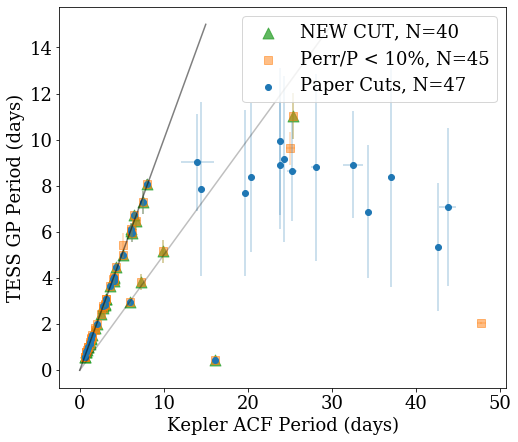

In [146]:
fig = plt.figure(figsize=(8,7))

plt.scatter(big['Period'][oknew], big['P_mean'][oknew], alpha=.75, c='C2', marker='^', s=120, 
            label='NEW CUT, N=40')

plt.errorbar(big['Period'][oknew], big['P_mean'][oknew], 
             yerr=big['P_sd'][oknew],xerr=big['Period_Err'][oknew],
             alpha=0.3, c='C2', linestyle='none')


plt.scatter(big['Period'][ok10], big['P_mean'][ok10], alpha=.5, c='C1', marker='s', s=70, 
            label='Perr/P < 10%, N=45')

plt.errorbar(big['Period'][ok10], big['P_mean'][ok10], 
             yerr=big['P_sd'][ok10],xerr=big['Period_Err'][ok10],
             alpha=0.3, c='C1', linestyle='none')

plt.scatter(big['Period'][ok], big['P_mean'][ok], alpha=1, c='C0', label='Paper Cuts, N=47')

plt.errorbar(big['Period'][ok], big['P_mean'][ok], 
             yerr=big['P_sd'][ok],xerr=big['Period_Err'][ok],
             alpha=0.3, c='C0', linestyle='none')

plt.legend()
plt.xlabel('Kepler ACF Period (days)')
plt.ylabel('TESS GP Period (days)')
# plt.xlim(0,40)
# plt.ylim(0,20)
plt.plot([0,15], [0,15], c='k', alpha=0.5)
plt.plot([0,30], [0,15], c='k', alpha=0.25)


# plt.savefig('KvT_mcmc.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

Text(17, 0.5, 'Contamination by V1104 Cyg')

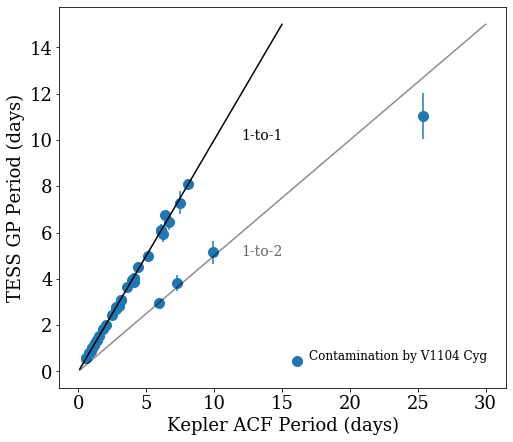

In [188]:
fig = plt.figure(figsize=(8,7))

plt.scatter(big['Period'][oknew], big['P_mean'][oknew], alpha=1, s=100 )
# plt.scatter(big['Period'], big['P_mean'], s=10, facecolor='none', edgecolor='k', alpha=0.75, marker='.')

plt.errorbar(big['Period'][oknew], big['P_mean'][oknew], 
             yerr=big['P_sd'][oknew],xerr=big['Period_Err'][oknew],
             alpha=1, linestyle='none')


# plt.legend()
plt.xlabel('Kepler ACF Period (days)')
plt.ylabel('TESS GP Period (days)')
# plt.xlim(0,40)
# plt.ylim(0,20)
plt.plot([0.1,15], [0.1,15], c='k', alpha=1)
plt.plot([0.1,30], [0.05,15], c='k', alpha=0.45)

# annotations
plt.text(12, 10,'1-to-1', fontsize=14)
plt.text(12, 5, '1-to-2', fontsize=14, alpha=0.6)
plt.text(17, 0.5, 'Contamination by V1104 Cyg', fontsize=12)

plt.savefig('KvT_mcmc.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [190]:
print(big['Period'].size, big['Period'][oknew].size)

249 40


In [144]:
wtf = np.where((big['Period'][oknew] > 10) & (big['P_mean'][oknew] < 2))[0]
big['TIC'][oknew].values[wtf]e

array([416266231])

Text(0, 0.5, 'Fraction Recovered')

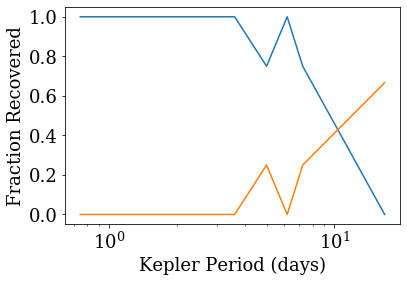

In [172]:
# RECOVERY FRACTION

# how close to the period do we need to be to be the "same"?
#      10% seems good
thresh = 0.1 

Pratio = big['P_mean'].values[oknew] / big['Period'].values[oknew] # GP / Kepler

good = ((Pratio > 1-thresh) & 
        (Pratio < 1+thresh))
half = ((Pratio > 0.5-thresh) & 
        (Pratio < 0.5+thresh))

pbins = ubin(big['Period'].values[oknew], nbins=10)
# pbins = np.logspace(-1.2, 1.8, num=20, dtype='float')
# pbins = np.arange(0, 55, 3., dtype='float')

pfrac = np.zeros_like(pbins)-1
hfrac = np.zeros_like(pbins)-1
e_pfrac = np.zeros((len(pbins), 2))-1
e_hfrac = np.zeros((len(pbins), 2))-1

for k in range(len(pbins)-1):
    
    pk = (big['Period'].values[oknew] > pbins[k]) & (big['Period'].values[oknew] <= (pbins[k+1]))
    den = float(sum(pk))
    num = float(sum(good[pk]))
    hal = float(sum(half[pk]))
    
    if den>0:
        pfrac[k] = num/den
        hfrac[k] = hal/den
        e_pfrac[k,:] = funcs.binom_conf_interval(num, den)
        e_hfrac[k,:] = funcs.binom_conf_interval(hal, den)

xx = ((pbins[:-1] + pbins[1:])/2)

plt.plot(xx[np.where((pfrac > -1))], pfrac[np.where((pfrac > -1))])
plt.plot(xx[np.where((hfrac > -1))], hfrac[np.where((hfrac > -1))])
plt.xscale('log')
plt.xlabel('Kepler Period (days)')
plt.ylabel('Fraction Recovered')

Text(0, 0.5, 'Fraction Correct')

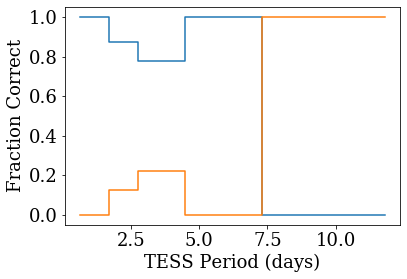

In [174]:
pbins = np.logspace(-.3, 2, num=12, dtype='float')
# pbins = np.arange(0, 55, 3., dtype='float')

Rpfrac = np.zeros_like(pbins)-1
Rphalf = np.zeros_like(pbins)-1
Re_pfrac = np.zeros((len(pbins), 2))-1
Re_phalf = np.zeros((len(pbins), 2))-1

for k in range(len(pbins)-1):
    pk = (big['P_mean'].values[oknew] > pbins[k]) & (big['P_mean'].values[oknew] <= (pbins[k+1]))
    den = float(sum(pk))
    num = float(sum(good[pk]))
    hal = float(sum(half[pk]))

    if den>0:
        Rpfrac[k] = num/den
        Rphalf[k] = hal/den
        Re_pfrac[k,:] = funcs.binom_conf_interval(num, den)
        Re_phalf[k,:] = funcs.binom_conf_interval(hal, den)

pxx = ((pbins[:-1] + pbins[1:])/2)
plt.figure()
plt.step(pxx[np.where((Rpfrac > -1))], Rpfrac[np.where((Rpfrac > -1))])
plt.step(pxx[np.where((Rphalf > -1))], Rphalf[np.where((Rphalf > -1))])
plt.xlabel('TESS Period (days)')
plt.ylabel('Fraction Correct')